In [21]:
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
base_path = "../CBIS-DDSM_Clean_Data/"
train = pd.read_csv(base_path + "train_full.csv")

In [71]:
image_path = os.path.join("../",(train["image_path"].iloc[0]))
image_path

'../CBIS-DDSM_Clean_Data/labeled_images_png/1.3.6.1.4.1.9590.100.1.2.100131208110604806117271735422083351547_full.png'

# Background Removal

In [72]:
def background_removal(image):

    # smooth image
    blur_img = cv2.GaussianBlur(image, (5,5), 0)

    # gets Otsu threshold 
    _, thresh = cv2.threshold(blur_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) 

    # apply morphological closing to make sure parts of the breast are not removed 
    kernel = np.ones((15, 15), np.uint8) 
    closed_img = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

    # Identify connecting regions for each pixel edge and corner (8) of binary image 
    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(closed_img, connectivity=8)

    # find the largest component that is connected
    largest_label = 1 + np.argmax(stats[1:, cv2.CC_STAT_AREA])
    
    # generate mask of black background
    mask = (labels == largest_label).astype(np.uint8) * 255
    breast_img = cv2.bitwise_and(image, image, mask=mask)
    
    
    
    
    plt.figure(figsize=(12,6))
    plt.subplot(1,4,1)
    plt.title("Original")
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
    plt.subplot(1,4,2)
    plt.title("Closed")
    plt.imshow(closed_img, cmap='gray')
    plt.axis('off')
    
    plt.subplot(1,4,3)
    plt.title("Otsu Mask")
    plt.imshow(mask, cmap='gray')
    plt.axis('off')
    
    plt.subplot(1,4,4)
    plt.title("Cleaned Breast")
    plt.imshow(breast_img, cmap='gray')
    plt.axis('off')
    
    plt.show()
    return breast_img

In [73]:
images = {}
images["original"] = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)


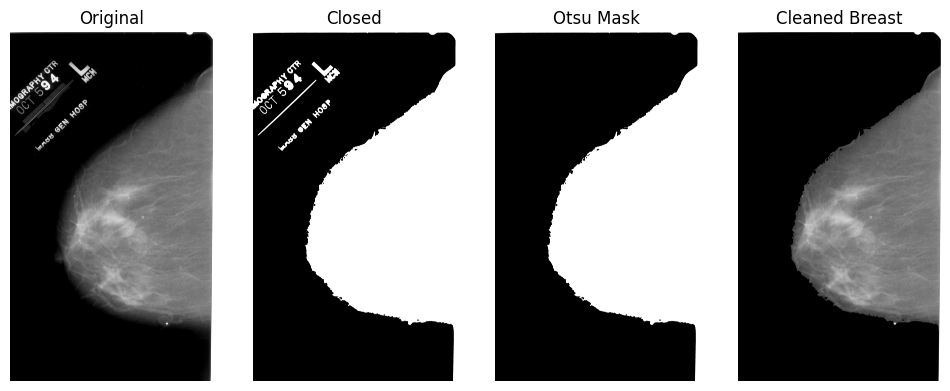

array([[179, 178, 176, ..., 255, 255, 255],
       [178, 178, 176, ..., 255, 255, 255],
       [178, 178, 176, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255]], dtype=uint8)

In [74]:
background_removal(images["original"])

# Crop and resizing